# Code for computing SI outbreaks on graphs analytically
#### by Wout Merbis and Ivano Lodato

In this notebook we explain and illustrate our numerical methods for computing analytically the contributions of different subgraph diagrams in the spreading process, following our paper "Logistic growth on networks" [1]. The code combines the network functionality of `NetworkX` and the analytical integration methods from `SymPy`.

Using `NetworkX` we can represent each diagram as a colored DiGraph, where node colorings refer to the different states: 'X' for initial infected (sources), 'I' for infected and 'B' for blue (sinks), see [1] for details. For graphical representation in Python, we color infected nodes light red (tomato) and source nodes as dark red. 

Each diagram is stored as an undirected graph, to make its identification simpler. There is a one-to-one map from undirected diagrams to directed diagrams, so we can always switch back and forth from directed diagrams to undirected diagrams.

All function definitions are contained in the Python script `SI_script.py`. Here we illustrate how to use this script to:
- Compute all diagrams with up to 7 edges
- How we read/write the diagram functions to file
- Example for the computation of expectation values for the complete graph $K_5$
- Extending the list of all known diagrams to 10 edges

Two accompanying Jupyter notebooks discuss:
- The exact solutions for the Florentine Families graph (*Florentine Families.ipynb*)
- The numerical validation of the above exact solution by means of Monte-Carlo simulations on the same graph (*Monte Carlo/Compare FF with MC.ipynb*)

[1] W. Merbis and I. Lodato, 'Logistic growth on networks', to be submitted 

In [1]:
run SI_script.py

SI_script loaded!


# Making the fundamental graph of diagrams from the ground up

Below is a code which 'grows' the graph of diagrams (`GG`) starting from initial conditions with a single source. The directed edges in `GG` point from any graph to its parents and the edge weights give the multiplicity and sign of the parents contribution to the coefficients.

First, we initialize a single source diagram. The graph attributes `coeff` stores the sign of each diagram, while the attribute `fun` contains its function of $t$. For the initial condition this function is simply 1. The `state` of the node `X` marks the initial infected (source) nodes

In [2]:
init=nx.DiGraph(coeff=1,fun=1)
init.add_node(0,state='X')

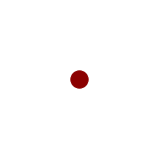

In [3]:
draw_diagrams(init)

The function `grow_fund_GG` will take as input a list of initial diagrams and compute all possible descendants by adding edges to the diagrams one at the time. It will do so following the rules of the SI system, as explained in [1]. These diagrams will form the nodes of the graph of diagrams (`GG`). It will then add the correct sign and multiplicity to the edges of `GG`, which we will need to integrate the diagram as a sum over the parent contributions. 

In [4]:
start=time.time()
GG=grow_fund_GG([init],7)
end=time.time()
print("GG computed in",end-start)

All 1 graphs at order 0 analyzed in 0.0002765655517578125 sec
All 1 graphs at order 1 analyzed in 0.0007908344268798828 sec
All 2 graphs at order 2 analyzed in 0.005529642105102539 sec
All 5 graphs at order 3 analyzed in 0.02605271339416504 sec
All 15 graphs at order 4 analyzed in 0.1248464584350586 sec
All 50 graphs at order 5 analyzed in 0.9861416816711426 sec
All 184 graphs at order 6 analyzed in 11.586916446685791 sec
982 nodes added in 12.73096752166748 sec
Parents multiplicities at order 1 added in 0.00023317337036132812 sec
Parents multiplicities at order 2 added in 0.0008101463317871094 sec
Parents multiplicities at order 3 added in 0.0030837059020996094 sec
Parents multiplicities at order 4 added in 0.01798105239868164 sec
Parents multiplicities at order 5 added in 0.07372617721557617 sec
Parents multiplicities at order 6 added in 0.3632845878601074 sec
Parents multiplicities at order 7 added in 1.825251579284668 sec
Finished in 2.2846643924713135 sec
GG computed in 15.0167093

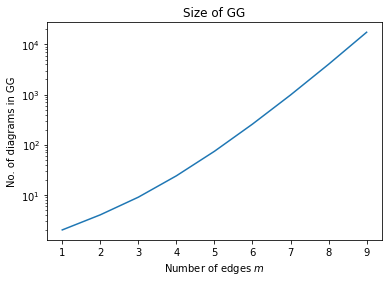

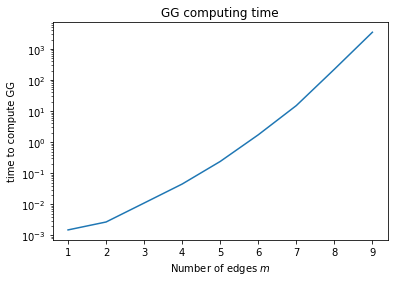

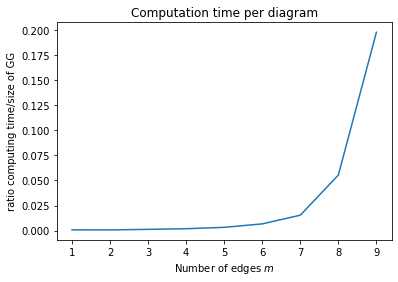

In [5]:
no_of_edges=[i+1 for i in range(9)]
length_of_GG = [2,4,9,24,74,258,982,4023,17509]
time_to_compute_GG = [0.0015, 0.0027, 0.011, 0.045, 0.24, 1.73, 15.1, 223.1, 3466]
rel_comp_time=[time_to_compute_GG[i]/length_of_GG[i] for i in range(len(no_of_edges))]

plt.semilogy(no_of_edges,length_of_GG)
plt.title("Size of GG")
plt.ylabel("No. of diagrams in GG")
plt.xlabel(r"Number of edges $m$")
plt.show()

plt.semilogy(no_of_edges,time_to_compute_GG)
plt.title("GG computing time")
plt.ylabel("time to compute GG")
plt.xlabel(r"Number of edges $m$")
plt.show()

plt.plot(no_of_edges,rel_comp_time)
plt.title("Computation time per diagram")
plt.ylabel("ratio computing time/size of GG")
plt.xlabel(r"Number of edges $m$")
plt.show()

Number of new diagrams at each order:

In [6]:
no_new_sgr=[1]
for i in range(len(length_of_GG)-1):
    no_new_sgr.append(length_of_GG[i+1]-length_of_GG[i])
list(no_new_sgr)

[1, 2, 5, 15, 50, 184, 724, 3041, 13486]

Here we display the parental relations for some graphs in `GG` to check whether the parents are identified correctly. The diagrams are all directed, but we plot the undirected graphs for visual clarity.

The diagram:


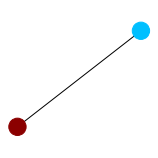

comes from:


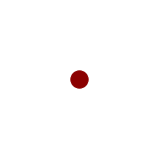

with multiplicity:  1
 
The diagram:


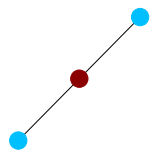

comes from:


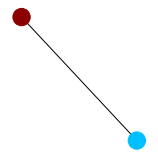

with multiplicity:  2
 
The diagram:


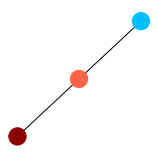

comes from:


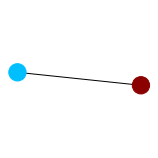

with multiplicity:  1
 
The diagram:


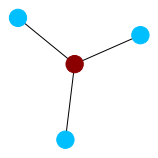

comes from:


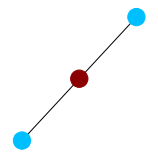

with multiplicity:  3
 
The diagram:


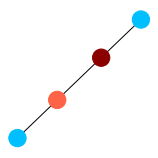

comes from:


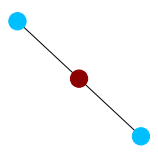

with multiplicity:  1
 


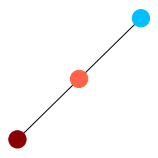

with multiplicity:  1
 
The diagram:


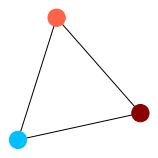

comes from:


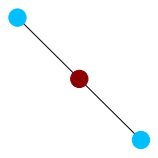

with multiplicity:  -1
 


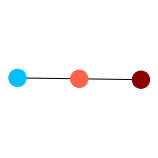

with multiplicity:  -1
 
The diagram:


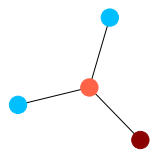

comes from:


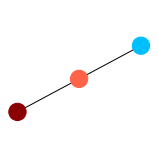

with multiplicity:  2
 
The diagram:


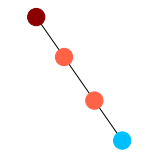

comes from:


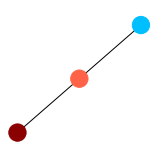

with multiplicity:  1
 
The diagram:


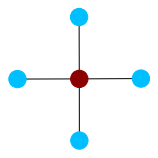

comes from:


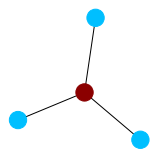

with multiplicity:  4
 
The diagram:


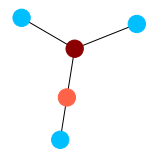

comes from:


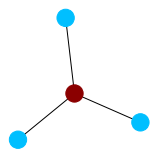

with multiplicity:  1
 


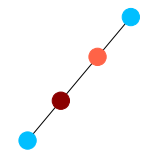

with multiplicity:  2
 
The diagram:


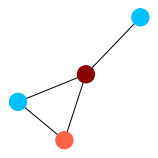

comes from:


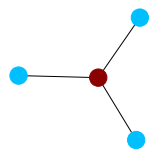

with multiplicity:  -1
 


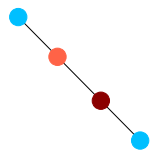

with multiplicity:  -1
 


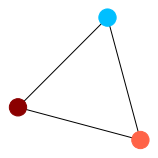

with multiplicity:  1
 
The diagram:


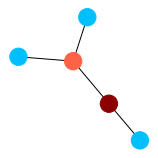

comes from:


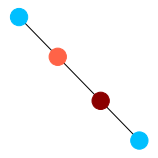

with multiplicity:  2
 


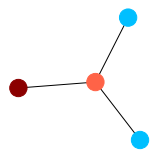

with multiplicity:  1
 
The diagram:


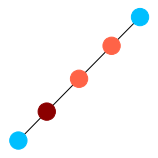

comes from:


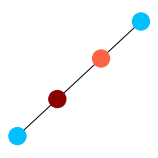

with multiplicity:  1
 


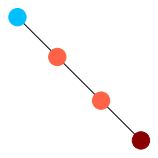

with multiplicity:  1
 
The diagram:


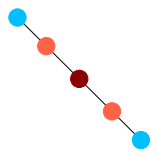

comes from:


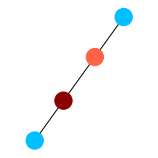

with multiplicity:  2
 
The diagram:


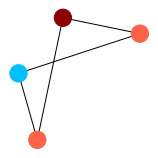

comes from:


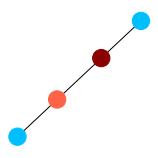

with multiplicity:  -2
 
The diagram:


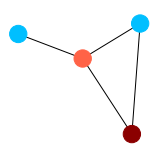

comes from:


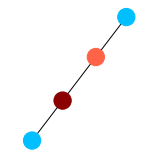

with multiplicity:  -1
 


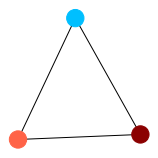

with multiplicity:  1
 


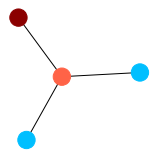

with multiplicity:  -1
 
The diagram:


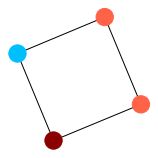

comes from:


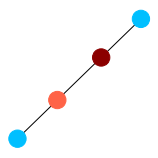

with multiplicity:  -1
 


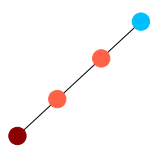

with multiplicity:  -1
 
The diagram:


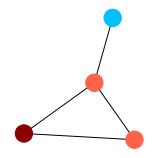

comes from:


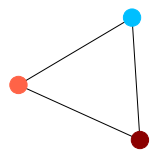

with multiplicity:  1
 
The diagram:


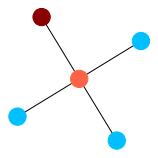

comes from:


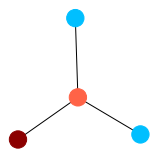

with multiplicity:  3
 


In [7]:
ls_GG=list(GG.nodes)

for i in range(1,20):
    print("============================")
    print("The diagram:")
    draw_diagrams(ls_GG[i].to_undirected())
    print("============================")
    print("comes from:")
    for desc in GG[ls_GG[i]]:
        draw_diagrams(desc.to_undirected())
        print("with multiplicity: ", GG.edges[ls_GG[i],desc]['weight'])
        print(" ")
        

Next, we should find the function of $t$ for each diagrams contribution by performing the integral

$$
a(t) = e^{-c t} \int_0^t e^{c s} d(s){\rm d} s\,,
$$

for each diagram, where $c$ is the number of edges ending in a blue node and $d(s) = \sum_{j \in {\rm parents}} \alpha_j a^j(t)$ such that $\alpha_j$ is the multiplicity and sign of the parent contributions $a^j(t)$. The $\alpha_j$ are stored in the edge weight of `GG`.

This is done by the function `fundamental_res(GG)` which starts at the lowest order (single edged diagrams) and integrates the parents contributions as stated above. It integrates and stores the functions of $t$ as `SymPy` objects, such that we can obtain  the symbolic expression for the function.

In [8]:
start=time.time()
fundamental_res(GG)
end=time.time()
print("Functions of t computed in t =",end-start)

Functions of t computed in t = 638.6021678447723


Let's display some of the functions:

The 875-th diagram


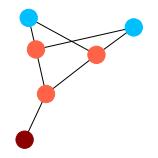

The result =  ((19 - 6*t**2)*exp(3*t) - 3*(2*t + 1)*exp(t) - 6*(2*t**2 + 4*t + 3)*exp(2*t) + 3*exp(4*t) - 1)*exp(-4*t)/3
The 876-th diagram


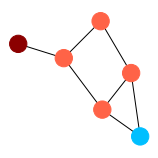

The result =  (12*t + (-12*t**3 + 12*t**2 + 168*t + (-t**4 - 16*t**3 - 36*t**2 + 120*t - 378)*exp(t) + 48*exp(2*t) + 312)*exp(t) + 18)*exp(-3*t)/24
The 877-th diagram


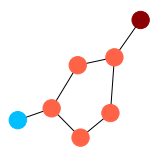

The result =  (-12*t**3 - 108*t**2 - 408*t + (t**4 + 8*t**3 + 24*t**2 - 192*t - 24*exp(t) + 648)*exp(t) - 624)*exp(-2*t)/24
The 878-th diagram


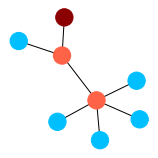

The result =  (48*(4 - 3*t)*exp(3*t) + (-72*t**2 + 84*t - 109)*exp(4*t) + 36*exp(5*t) - 144*exp(2*t) + 28*exp(t) - 3)*exp(-5*t)/36
The 879-th diagram


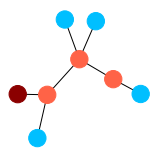

The result =  (6*t - 9*(5*t + 14)*exp(t) + 9*(-2*t**2 - 8*t + 25)*exp(2*t) + (-6*t**3 - 54*t**2 + 81*t - 146)*exp(3*t) + 36*exp(4*t) + 11)*exp(-4*t)/36
The 880-th diagram


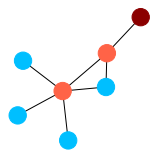

The result =  (48*(3*t - 4)*exp(3*t) + (72*t**2 - 84*t + 109)*exp(4*t) - 36*exp(5*t) + 144*exp(2*t) - 28*exp(t) + 3)*exp(-5*t)/36
The 881-th diagram


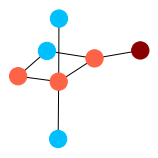

The result =  (-6*t + 9*(5*t + 14)*exp(t) + 9*(2*t**2 + 8*t - 25)*exp(2*t) + (6*t**3 + 54*t**2 - 81*t + 146)*exp(3*t) - 36*exp(4*t) - 11)*exp(-4*t)/36
The 882-th diagram


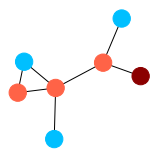

The result =  (-6*t + 9*(5*t + 14)*exp(t) + 9*(2*t**2 + 8*t - 25)*exp(2*t) + (6*t**3 + 54*t**2 - 81*t + 146)*exp(3*t) - 36*exp(4*t) - 11)*exp(-4*t)/36
The 883-th diagram


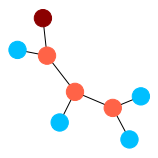

The result =  (-3*(4*t + 3)*exp(t) + 6*(-2*t**2 - 2*t + 1)*exp(2*t) - (4*t**3 + 6*t**2 + 6*t + 7)*exp(3*t) + 12*exp(4*t) - 2)*exp(-4*t)/12
The 884-th diagram


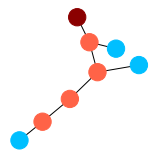

The result =  (-6*t**2 - 30*t + 4*(-t**3 - 3*t**2 - 6*t + 24)*exp(t) + (-t**4 - 4*t**3 - 24*t**2 + 24*t - 69)*exp(2*t) + 24*exp(3*t) - 51)*exp(-3*t)/24
The 885-th diagram


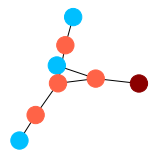

The result =  (-6*t**2 - 30*t + 12*(2*t + 11)*exp(t) + (-4*t**3 - 12*t**2 + 36*t - 99)*exp(2*t) + 12*exp(3*t) - 45)*exp(-3*t)/12
The 886-th diagram


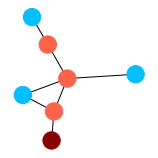

The result =  (-6*t + 9*(5*t + 14)*exp(t) + 9*(2*t**2 + 8*t - 25)*exp(2*t) + (6*t**3 + 54*t**2 - 81*t + 146)*exp(3*t) - 36*exp(4*t) - 11)*exp(-4*t)/36
The 887-th diagram


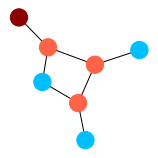

The result =  (3*(4*t + 3)*exp(t) + 6*(2*t**2 + 2*t - 1)*exp(2*t) + (4*t**3 + 6*t**2 + 6*t + 7)*exp(3*t) - 12*exp(4*t) + 2)*exp(-4*t)/12
The 888-th diagram


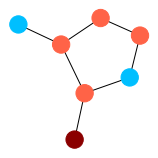

The result =  (6*t**2 + 30*t + 4*(t**3 + 3*t**2 + 6*t - 24)*exp(t) + (t**4 + 4*t**3 + 24*t**2 - 24*t + 69)*exp(2*t) - 24*exp(3*t) + 51)*exp(-3*t)/24
The 889-th diagram


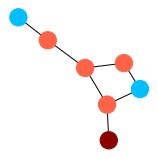

The result =  (6*t**2 + 30*t - 12*(2*t + 11)*exp(t) + (4*t**3 + 12*t**2 - 36*t + 99)*exp(2*t) - 12*exp(3*t) + 45)*exp(-3*t)/12


In [9]:
for i in range(875,890):
    print("The {}-th diagram".format(i))
    draw_diagrams(ls_GG[i].to_undirected())
    print("The result = ",ls_GG[i].graph['fun'])
    print("=====================================================================================================")

# Code for reading/writing the diagrams from a .csv file

We want to store the diagrams on file, so that we can avoid having to do the same calculation many times. This requires us to think of an efficient way to store and later look-up the diagrams functions.

First, we need a way to uniquely label a given diagram. To this end, we define a map from the diagram to a matrix. This matrix has the nodes state (`'X'`,`'I'`, or `'B'`) on the diagonal and the diagrams (undirected!) adjacency matrix as the off-diagonal elements. We convert this matrix to a tuple to write to a file. This way, any diagram can be converted to a matrix and back.

A fast way to search through the list is implemented by computing first the determinant of the identifying matrix, and then evaluate this determinant for some fixed (integer) values for `'X'`,`'I'`, and `'B'`. We choose three sets of integer values, which produces three integer numbers for each diagram. These three numbers serve as an identifier for the diagram.

We then define the function `write_diagrams(filename,GG)` to write the diagrams to a `.csv` file. Each line of the `.csv` file contains (in order):

1. The order of the diagram, which equals the number of edges of the undirected diagram
2. The diagrams matrix as a tuple
3. The diagrams sign (which is stored as the graph attribute `diagram.graph['coeff']`).
4. The diagrams contribution as a function of $t$ (which is stored as the graph attribute `diagram.graph['fun']`).
5. The diagrams determinant
6. The diagrams identifier

To look-up any given diagram, we can call `lookup_diagram(filename,diagram)`. It will first search the `.csv` file for the correct order, then lookup the diagrams identifier and finally check whether the diagram constructed from the matrix tuple on file is topologically equivalent to the sought-after diagram. This last check is necessary as not all diagrams determinants are unique for diagrams with more than 9 edges. 

We create here the `csv` file for all diagrams with up to 7 edges by writing the diagrams in the recently computed `GG` to file.

In [10]:
start=time.time()
write_diagrams('diagrams.csv',GG)
write_time=time.time()
print("Diagrams written in t=",write_time-start)

Diagrams written in t= 176.59508872032166


# Example: the complete graph $K_{5}$

To compute the expectation value for a single node to be infected, we call on `compute_op(G,source,sink)`. This function performs 'Algorithm 1: Compute expectation value' from the supplemental material of [1]. First a list of all contributing diagrams is made. This list considers all labeled configurations contributing to the expectation value, so it contains diagrams with equivalent topology. A list of diagrams with inequivalent topologies is made and used as the basis of the graph of diagrams.

Then, for each of these diagrams, the parents are found and added to the nodes of `GG`. They are connected to their descendants by weighted edges, where the edge weights correspond to the sign and multiplicity of the parent-son relation. 

The known diagrams are filled in from the `.csv` file and the unknown diagrams are then integrated. The final answer is the sum of all (labeled) contributing diagrams. The function returns this final answer, as well as the complete list of diagrams just computed, organized as a list of lists of diagrams arranged by the diagrams order.

Note that there are more efficient ways to compute the complete graph exactly, by using the permutation symmetry of the graph. The complete graph is used here as an example to illustrate the code. This can compute, however, the exact result for any arbitrary graph, as we show in the accompanying notebook for the Florentine Families network.

In [11]:
G=nx.complete_graph(5)

expk5, pert_fund_sgrk5 = compute_op(G,0,1)

Computing contributing diagrams
There are 383 contributing diagrams, computed in 3.271909236907959s
Making list of inequivalent diagrams
There are 87 inequivalent diagrams
Computing graph of graphs for diagrams at order > 7
Finished 1 diagrams at order 10 in t = 0.007371425628662109 s
Finished 5 diagrams at order 9 in t = 0.032950401306152344 s
Finished 16 diagrams at order 8 in t = 0.11958956718444824 s
GG computed in t=0.16007781028747559
There are 104 diagrams of which 22 unknown
Looking up known contributions
Looking up order  0
Looking up order  1
Looking up order  2
Looking up order  3
Looking up order  4
Looking up order  5
Looking up order  6
Looking up order  7
Assigned known (order 7) results to diagrams in 6.037771224975586 seconds
Integrating unknown diagrams in the graph of graphs.
16 diagrams at order 8 integrated in t=22.80184507369995s
5 diagrams at order 9 integrated in t=7.9792234897613525s
1 diagrams at order 10 integrated in t=1.9881131649017334s
Computed the result

Now we can plot the result for the expectation value for any node in $K_5$ to be infected, given one other node was initially infected.

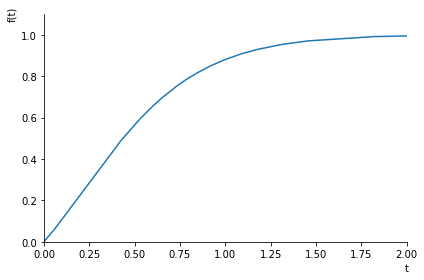

In [12]:
from sympy.plotting import plot

p1=plot(expk5, xlim=(0,2),ylim=(0,1.1),show=False)
p1.show()

# Extending the list of known diagrams

So far we have computed all diagrams with up to 7 edges, but we would like to have a few more on file. We can use `grow_fund_GG(ls_lastord,m)` to input the list of all diagrams at some order `ls_lastord` and continue constructing the graph of diagrams for `m` more orders. 

First, we can read from the file all diagrams at order 7:

In [13]:
ls_diag_o7 = read_diagrams_at_order('diagrams.csv',7)

Next, we call again `grow_fund_GG`, but now input the list of all diagrams at order 7, `ls_diag_o7`. It will compute the diagrams at order 8 if we set `m=1`

In [14]:
start=time.time()
GG = grow_fund_GG(ls_diag_o7,1)
end=time.time()
print("GG extended from 7 to 8 edged diagrams in t =",end-start)

All 724 graphs at order 7 analyzed in 171.4753668308258 sec
3765 nodes added in 171.47536873817444 sec
Parents multiplicities at order 8 added in 9.792255640029907 sec
Finished in 9.792256832122803 sec
GG extended from 7 to 8 edged diagrams in t = 181.26974511146545


The diagrams at order 8 are now integrated by calling `fundamental_res(GG)`

In [15]:
start=time.time()
fundamental_res(GG)
end=time.time()
print("Functions of t computed in t =",end-start)

Functions of t computed in t = 3005.0653994083405


Finally, the diagrams at order 8 are appended to the csv file `diagrams.csv`

In [16]:
start=time.time()
for diagram in GG.nodes():
    if len(diagram.to_undirected().edges) == 8:
        append_diagram_to_file('diagrams.csv',diagram)
end=time.time()
print("Order 8 added in t=",end-start)

Order 8 added in t= 956.0533266067505


## All 10 edge diagrams

Continuing along the same lines, we compute and store all diagrams with up to 10 edges in the .csv file. This takes a while (~ 2/3 days) to run.

In [17]:
start=time.time()
ls_diag_o8 = read_diagrams_at_order('diagrams.csv',8)
mid1=time.time()
print("Diagrams at order 8 read in t=",mid1-start)
GG = grow_fund_GG(ls_diag_o8,2)
mid2=time.time()
print("GG extended from 8 to 10 edged diagrams in t =",mid2-mid1)
fundamental_res(GG)
mid3=time.time()
print("Functions of t computed in t =",mid3-mid2)
for diagram in GG.nodes():
    if len(diagram.to_undirected().edges) > 8:
        append_diagram_to_file('diagrams.csv',diagram)
end=time.time()
print("Order 9 and 10 added in t=",end-mid3)
print("Total computing time t={} s".format(end-start))

Diagrams at order 8 read in t= 31.362807989120483
All 3041 graphs at order 8 analyzed in 2785.296756029129 sec
All 13486 graphs at order 9 analyzed in 55056.6016330719 sec
79350 nodes added in 57841.89844942093 sec
Parents multiplicities at order 9 added in 50.89561748504639 sec
Parents multiplicities at order 10 added in 294.58279037475586 sec
Finished in 345.4784653186798 sec
GG extended from 8 to 10 edged diagrams in t = 58187.48059749603
Functions of t computed in t = 113771.29899454117
Order 9 and 10 added in t= 49637.464189291
Total computing time t=221627.60658931732 s


Total number of diagrams with up to 10 edges is the number of nodes in GG plus the 982 diagrams with 7 edges or less: 

In [20]:
len(GG)+982

80332